This notebook is dedicated to understanding the data and precapre the input for the model according to the dataset and the desired putput.

---

In [1]:
import torch
from PIL import Image
from model import end_to_end

model = end_to_end()
model.eval()

end_to_end(
  (enc_conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn6): BatchNorm2d(256

In [12]:
import matplotlib.pyplot as plt
from torchvision import transforms
import matplotlib.image as mpimg
import torch.nn.functional as F

filename = '/Users/farida/Documents/subtract-model/clothing-co-parsing/photos/0001.jpg'

input_image = mpimg.imread(filename)
print(input_image.shape)

preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

with torch.no_grad():
    output = model(input_batch)[0]
output_predictions = output.softmax(0)

(832, 550, 3)


In [13]:
print(output_predictions)

tensor([[[0.5026, 0.5031, 0.5027,  ..., 0.5030, 0.5031, 0.5028],
         [0.5021, 0.5015, 0.5018,  ..., 0.5017, 0.5017, 0.5014],
         [0.5016, 0.5021, 0.5011,  ..., 0.5016, 0.5013, 0.5014],
         ...,
         [0.5018, 0.5013, 0.5015,  ..., 0.5018, 0.5016, 0.5014],
         [0.5022, 0.5019, 0.5018,  ..., 0.5018, 0.5016, 0.5017],
         [0.5017, 0.5013, 0.5016,  ..., 0.5014, 0.5017, 0.5018]],

        [[0.4974, 0.4969, 0.4973,  ..., 0.4970, 0.4969, 0.4972],
         [0.4979, 0.4985, 0.4982,  ..., 0.4983, 0.4983, 0.4986],
         [0.4984, 0.4979, 0.4989,  ..., 0.4984, 0.4987, 0.4986],
         ...,
         [0.4982, 0.4987, 0.4985,  ..., 0.4982, 0.4984, 0.4986],
         [0.4978, 0.4981, 0.4982,  ..., 0.4982, 0.4984, 0.4983],
         [0.4983, 0.4987, 0.4984,  ..., 0.4986, 0.4983, 0.4982]]])


In [14]:
print(output)

tensor([[[0.5052, 0.5062, 0.5055,  ..., 0.5061, 0.5061, 0.5055],
         [0.5042, 0.5030, 0.5036,  ..., 0.5033, 0.5034, 0.5028],
         [0.5032, 0.5042, 0.5022,  ..., 0.5033, 0.5027, 0.5029],
         ...,
         [0.5036, 0.5026, 0.5031,  ..., 0.5035, 0.5032, 0.5028],
         [0.5044, 0.5038, 0.5036,  ..., 0.5036, 0.5032, 0.5035],
         [0.5035, 0.5026, 0.5032,  ..., 0.5029, 0.5033, 0.5036]],

        [[0.4948, 0.4938, 0.4945,  ..., 0.4939, 0.4939, 0.4945],
         [0.4958, 0.4970, 0.4964,  ..., 0.4967, 0.4966, 0.4972],
         [0.4968, 0.4958, 0.4978,  ..., 0.4967, 0.4973, 0.4971],
         ...,
         [0.4964, 0.4974, 0.4969,  ..., 0.4965, 0.4968, 0.4972],
         [0.4956, 0.4962, 0.4964,  ..., 0.4964, 0.4968, 0.4965],
         [0.4965, 0.4974, 0.4968,  ..., 0.4971, 0.4967, 0.4964]]])


torch.Size([2, 224, 224])


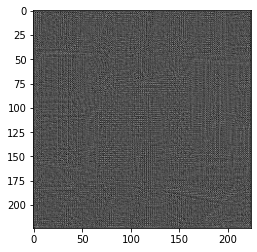

In [15]:
print(output_predictions.shape)
plt.imshow(output_predictions[0], cmap='gray')

In [6]:
import torchvision
from torch import nn
import torch

# Download  pretrained VGG16 model discarding the Linear layers
VGG16 = torchvision.models.vgg16_bn(pretrained=True).features

print(VGG16)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

In [9]:
model.enc_conv1.weight = VGG16[0].weight
model.enc_bn1.weight = VGG16[1].weight

model.enc_conv2.weight = VGG16[3].weight
model.enc_bn2.weight = VGG16[4].weight

model.enc_conv3.weight = VGG16[7].weight
model.enc_bn3.weight = VGG16[8].weight

model.enc_conv4.weight = VGG16[10].weight
model.enc_bn4.weight = VGG16[11].weight

model.enc_conv5.weight = VGG16[14].weight
model.enc_bn5.weight = VGG16[15].weight

model.enc_conv6.weight = VGG16[17].weight
model.enc_bn6.weight = VGG16[18].weight

model.enc_conv7.weight = VGG16[20].weight
model.enc_bn7.weight = VGG16[21].weight

model.enc_conv8.weight = VGG16[24].weight
model.enc_bn8.weight = VGG16[25].weight

model.enc_conv9.weight = VGG16[27].weight
model.enc_bn9.weight = VGG16[28].weight

model.enc_conv10.weight = VGG16[30].weight
model.enc_bn10.weight = VGG16[31].weight

model.enc_conv11.weight = VGG16[34].weight
model.enc_bn11.weight = VGG16[35].weight

model.enc_conv12.weight = VGG16[37].weight
model.enc_bn12.weight = VGG16[38].weight

model.enc_conv13.weight = VGG16[40].weight
model.enc_bn13.weight = VGG16[41].weight

In [11]:
print(model.enc_conv1.weight == VGG16[0].weight)

tensor([[[[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]]],


        [[[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]]],


        [[[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],
          [True, True, True]]],


        ...,


        [[[True, True, True],
          [True, True, True],
          [True, True, True]],

         [[True, True, True],
          [True, True, True],

### Load Dataset:

In [36]:
images_path = './clothing-co-parsing/photos/'
lables_path = './lables/'

dataset = []

for i in range(1004):
    entry = []
    im_num = str(i+1).rjust(4, '0')
    
    entry.append(preprocess(mpimg.imread(images_path + im_num + '.jpg')))
    entry.append(lables_path + im_num + '.npz')
    
    dataset.append(entry)

print(len(dataset))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

1004


AttributeError: 'list' object has no attribute 'shape'

### Train

In [37]:
import torch.optim as optim

batch_size = 512
num_epochs = 5
lr = 0.001

criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr)

2


In [43]:
def train(num_epochs):

    # prepare the net for training
    model.train()

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(dataloader):
            # get the input images and their corresponding labels
            images = data[0]
            lables = data[1]
            
            # convert variables to floats for regression loss
            #lables = lables.type(torch.FloatTensor)
            #images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output = model(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output, lables)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()
            #print(batch_i)
            
            if batch_i % 5 == 4:    # print every
                print('Epoch: {}, Batch: {}, \t Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/5))
                running_loss = 0.0
            
    print('Finished Training')

In [44]:
train(num_epochs)

KeyboardInterrupt: 